In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
#Load the dataset from the repository
df = pd.read_csv("/workspaces/Customer_Churn_Prediction_Group_06/Customer_Churn_Prediction_Group_06/dataset/churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for duplicate rows and remove, keeping the first occurrence
print(df.duplicated().sum())

0


In [5]:
# Check for the missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# create a copy of the dataset
df_copy = df.copy()

In [7]:
numerical_cols = df.select_dtypes(include=['float64']).columns
print(numerical_cols)
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['MonthlyCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [8]:
df_copy = df_copy.drop(['customerID'], axis = 1)

# Map binary variables
df_copy['Churn'] = df_copy['Churn'].map({'Yes': 1, 'No': 0})

# Map multiclass in One-hot encoding
df_copy = pd.get_dummies(df_copy, drop_first=True)

df_copy.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
X = df_copy.drop('Churn', axis=1) #Add the features to X set
y = df_copy['Churn'] #Add churn results to Y set

#80-20 data split with randomness seed set to 33
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=33 
)

## Training

In [10]:
rf = RandomForestClassifier()

randomForestModel = rf.fit(X_train, Y_train)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

def predict_churn(model):
    # --------------------
    # Train va test predict
    # --------------------
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # --------------------
    # Metrics
    # --------------------
    score_train = f1_score(Y_train, pred_train)
    score_test = f1_score(Y_test, pred_test)

    accuracy_train = accuracy_score(Y_train, pred_train)
    accuracy_test = accuracy_score(Y_test, pred_test)

    precision_train = precision_score(Y_train, pred_train)
    precision_test = precision_score(Y_test, pred_test)

    recall_train = recall_score(Y_train, pred_train)
    recall_test = recall_score(Y_test, pred_test)

    # --------------------
    # Print metrics
    # --------------------
    print("-" * 50)
    print(f"Train F1 Score   : {score_train:.4f}")
    print(f"Test  F1 Score   : {score_test:.4f}")
    print("-" * 50)
    print(f"Train Accuracy   : {accuracy_train:.4f}")
    print(f"Test  Accuracy   : {accuracy_test:.4f}")
    print("-" * 50)
    print(f"Train Precision  : {precision_train:.4f}")
    print(f"Test  Precision  : {precision_test:.4f}")
    print("-" * 50)
    print(f"Train Recall     : {recall_train:.4f}")
    print(f"Test  Recall     : {recall_test:.4f}")
    print("-" * 50)
    print("\nClassification Report (Test):\n")
    print(classification_report(Y_test, pred_test))
    print("-" * 50)

    # --------------------
    # Confusion Matrix & ROC Curve (Subplots)
    # --------------------
    cm = confusion_matrix(Y_test, pred_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(Y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Confusion Matrix')

    # ROC Curve
    axes[1].plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

--------------------------------------------------
Train F1 Score   : 0.9966
Test  F1 Score   : 0.5352
--------------------------------------------------
Train Accuracy   : 0.9982
Test  Accuracy   : 0.7892
--------------------------------------------------
Train Precision  : 0.9980
Test  Precision  : 0.6680
--------------------------------------------------
Train Recall     : 0.9953
Test  Recall     : 0.4465
--------------------------------------------------

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1026
           1       0.67      0.45      0.54       383

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409

--------------------------------------------------


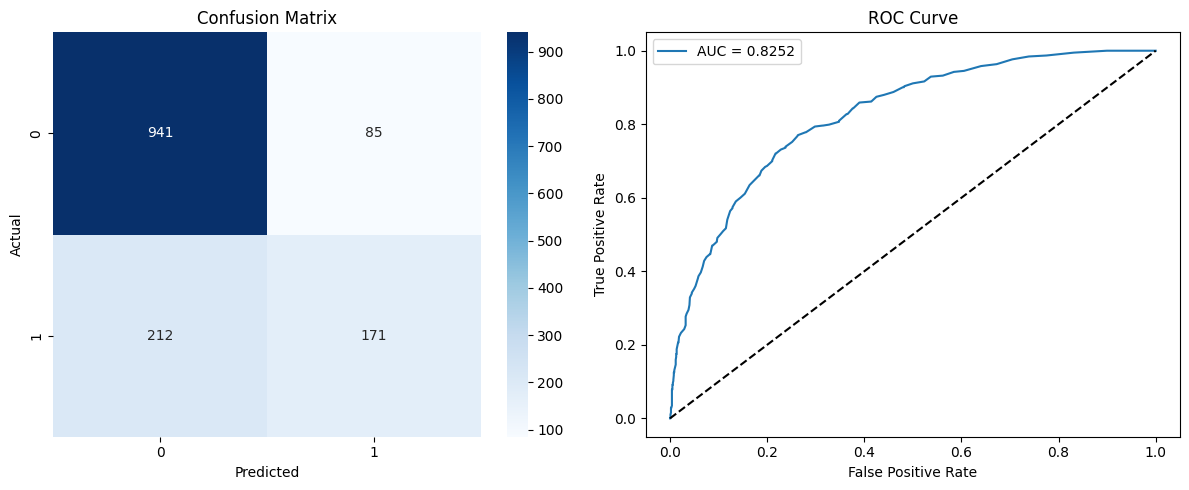

In [11]:
predict_churn(randomForestModel)